In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(87439, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2019-03-18,21.53,38000.0,1764.979099,5834.641431,연립/다세대,31.0
1,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-10-16,44.19,65000.0,1470.921023,4862.548654,연립/다세대,32.0
2,서울특별시 강남구 개포동,170-18,제2종일반주거지역,8m미만,2020-12-23,21.53,31000.0,1439.851370,4759.839062,연립/다세대,32.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.00,52000.0,1155.555556,3820.018222,연립/다세대,30.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.00,50000.0,1111.111111,3673.094444,연립/다세대,31.0


In [4]:
target = '시흥동'
target_purpose = '준공업'

In [5]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(88, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
32297,서울특별시 금천구 시흥동,113-0,준공업지역,25m미만,2018-01-08,81.83,110000.0,1344.250275,4443.802395,연립/다세대,40.0
24821,서울특별시 금천구 시흥동,1**,준공업지역,8m미만,2018-10-19,111.50,106466.0,954.852018,3156.535478,토지,NaN
8204,서울특별시 금천구 시흥동,9**,준공업,25m이상,2020-02-18,390.90,371300.0,949.859299,3140.030623,상업/업무,35.0
8203,서울특별시 금천구 시흥동,9**,준공업,25m이상,2020-02-18,808.50,767961.0,949.858998,3140.029628,상업/업무,44.0
33102,서울특별시 금천구 시흥동,9**,준공업지역,25m이상,2020-02-18,46.70,44358.0,949.850107,3140.000236,토지,NaN


In [7]:
target_df = target_df.sort_values(['단가(평)'], ascending=False)
target_df.head(20)

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
32297,서울특별시 금천구 시흥동,113-0,준공업지역,25m미만,2018-01-08,81.83,110000.0,1344.250275,4443.802395,연립/다세대,40.0
24821,서울특별시 금천구 시흥동,1**,준공업지역,8m미만,2018-10-19,111.50,106466.0,954.852018,3156.535478,토지,NaN
8204,서울특별시 금천구 시흥동,9**,준공업,25m이상,2020-02-18,390.90,371300.0,949.859299,3140.030623,상업/업무,35.0
8203,서울특별시 금천구 시흥동,9**,준공업,25m이상,2020-02-18,808.50,767961.0,949.858998,3140.029628,상업/업무,44.0
33102,서울특별시 금천구 시흥동,9**,준공업지역,25m이상,2020-02-18,46.70,44358.0,949.850107,3140.000236,토지,NaN
6752,서울특별시 금천구 시흥동,982-0,준공업지역,25m이상,2021-01-09,32.83,31000.0,944.258300,3121.514925,연립/다세대,32.0
6751,서울특별시 금천구 시흥동,982-0,준공업지역,25m이상,2020-09-26,32.83,29500.0,898.568383,2970.473881,연립/다세대,31.0
1866,서울특별시 금천구 시흥동,9**,준공업,25m이상,2016-10-04,390.90,350000.0,895.369660,2959.899591,상업/업무,31.0
6754,서울특별시 금천구 시흥동,982-0,준공업지역,25m이상,2021-01-23,50.96,42000.0,824.175824,2724.548077,연립/다세대,32.0
6755,서울특별시 금천구 시흥동,982-0,준공업지역,25m이상,2021-02-24,50.96,42000.0,824.175824,2724.548077,연립/다세대,32.0


In [9]:
target_df.to_excel(basedir + '{}_{}.xlsx'.format(target, target_purpose), index=False)

<AxesSubplot:title={'center':'2015~최신 시흥동 준공업 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 88건의 단가 산포도와 회귀선'}, ylabel='단가(평)'>

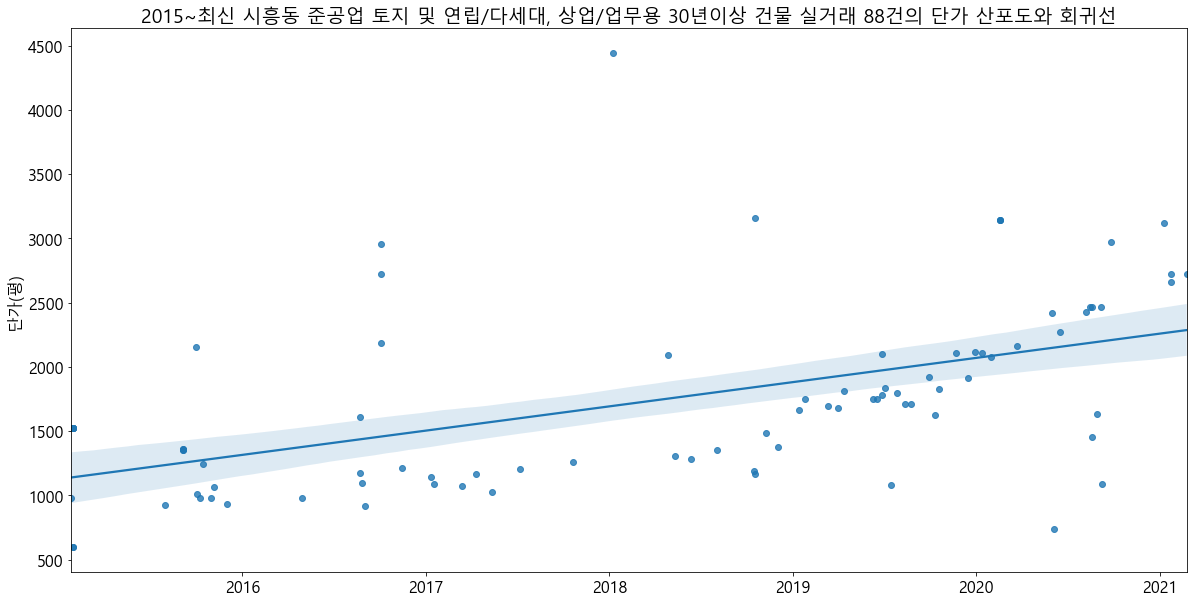

In [10]:
f, ax = plt.subplots(figsize=(20,10))
plt.title('2015~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 산포도와 회귀선'.format(target, target_purpose, target_df.shape[0]))
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])

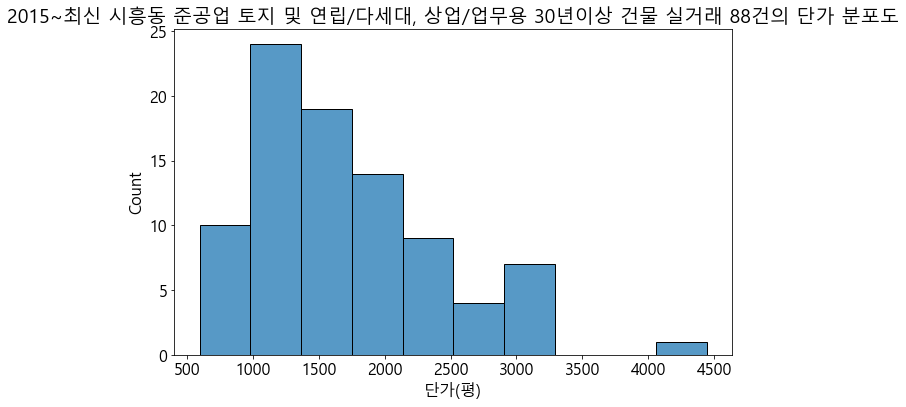

거래량: 88.0
평균: 1735.3420236208085
표준편차: 711.7381955701138
최소: 597.161992264151
25분위: 1188.0809003440218
중간값: 1615.476912227843
75분위: 2109.8545942164183
최대: 4443.802395209582


<Figure size 432x288 with 0 Axes>

In [11]:
f, ax = plt.subplots(figsize=(10,6))
plt.title('2015~최신 {} {} 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])

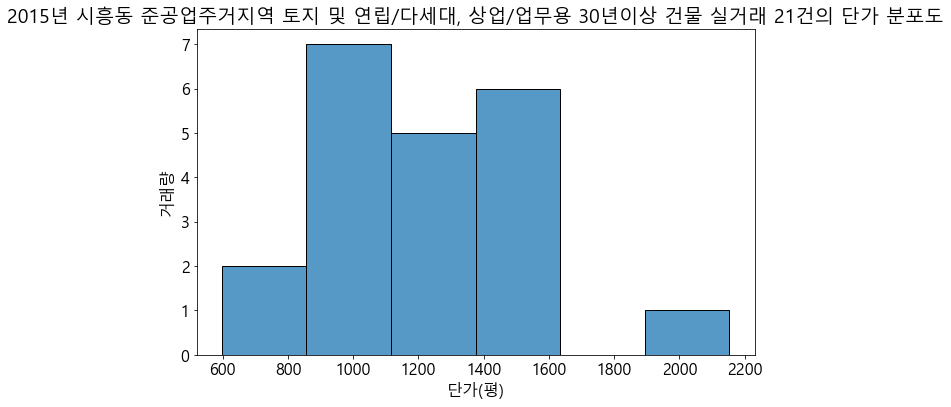

거래량: 21.0
평균: 1239.994702518202
표준편차: 366.4256775685661
최소: 597.161992264151
25분위: 977.7673943661972
중간값: 1355.37185
75분위: 1525.123518995272
최대: 2152.527172551966


<Figure size 432x288 with 0 Axes>

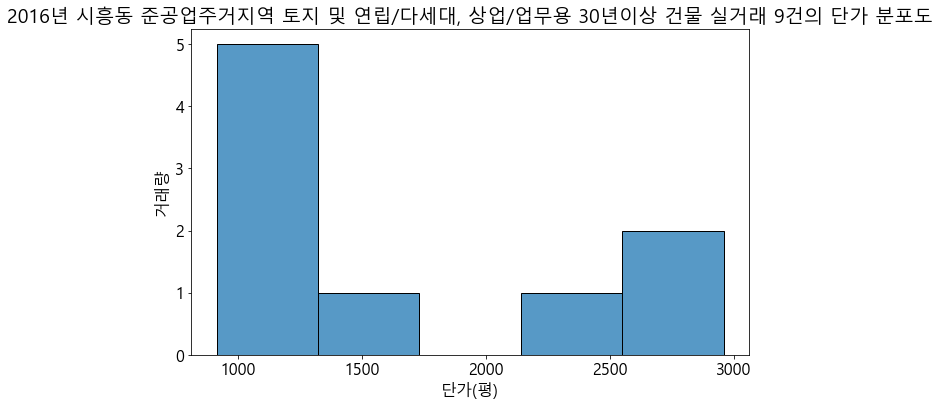

거래량: 9.0
평균: 1649.6823572387539
표준편차: 780.5608833364439
최소: 914.271748240027
25분위: 1094.1682746478875
중간값: 1210.5691549295775
75분위: 2189.3775829183005
최대: 2959.899590688156


<Figure size 432x288 with 0 Axes>

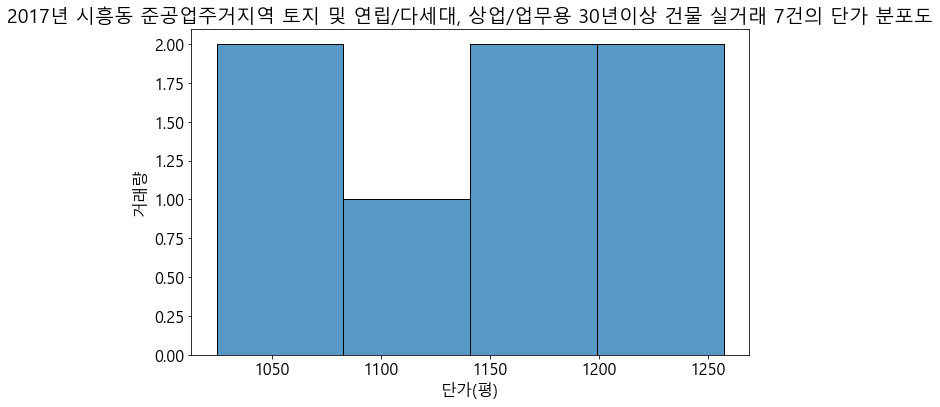

거래량: 7.0
평균: 1136.3453053419457
표준편차: 80.61496072099301
최소: 1024.3277464788732
25분위: 1081.154667288359
중간값: 1140.7286267605634
75분위: 1184.9609612676059
최대: 1257.1295070422536


<Figure size 432x288 with 0 Axes>

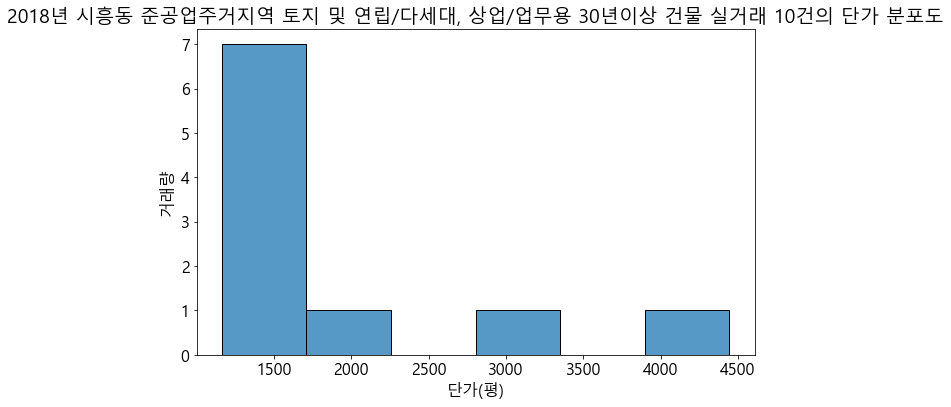

거래량: 10.0
평균: 1884.5640315438668
표준편차: 1085.92105353184
최소: 1164.0088028169016
25분위: 1287.4102926269738
중간값: 1361.8902992957746
75분위: 1940.1750478569422
최대: 4443.802395209582


<Figure size 432x288 with 0 Axes>

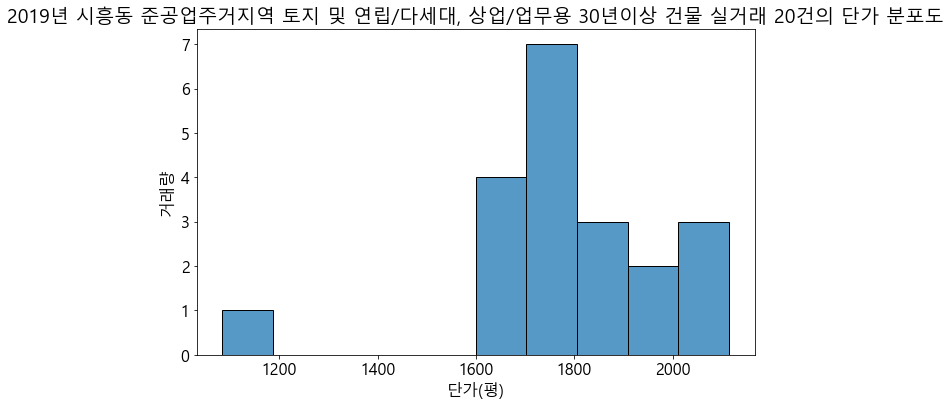

거래량: 20.0
평균: 1781.3894750908917
표준편차: 220.08290182114874
최소: 1083.263408263416
25분위: 1707.1268854047075
중간값: 1767.7127403846152
75분위: 1855.2875000000001
최대: 2114.574626865672


<Figure size 432x288 with 0 Axes>

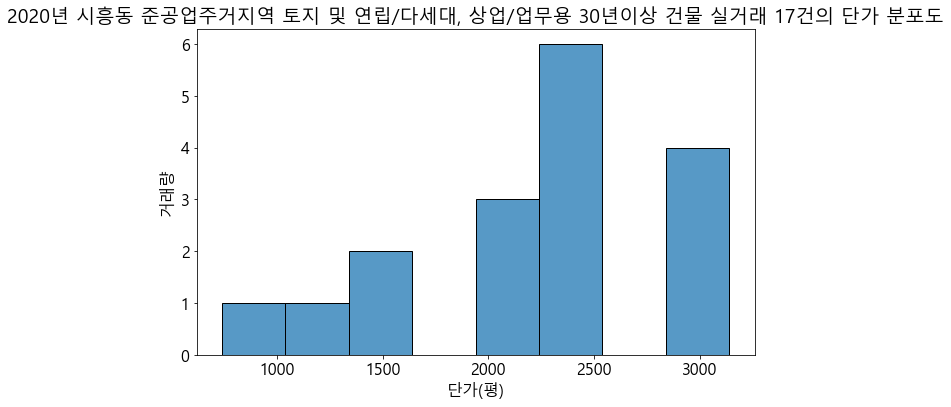

거래량: 17.0
평균: 2244.996011300903
표준편차: 698.0221187441962
최소: 739.9312155647384
25분위: 2075.846153846154
중간값: 2416.6567164179105
75분위: 2467.003731343284
최대: 3140.030622921464


<Figure size 432x288 with 0 Axes>

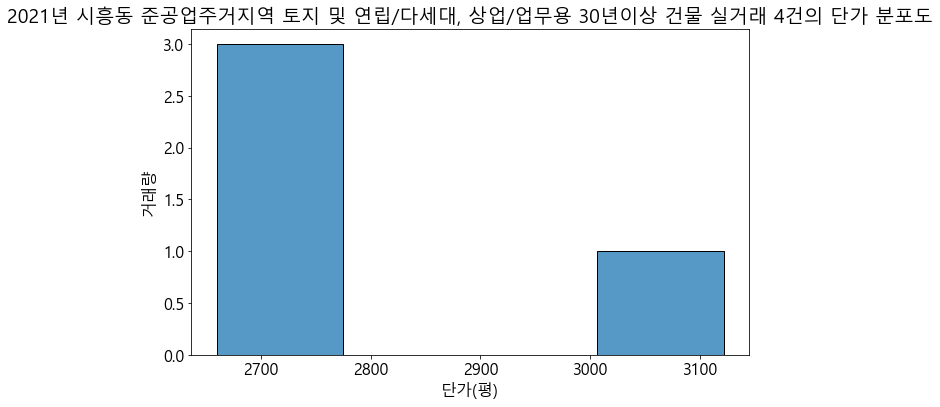

거래량: 4.0
평균: 2807.5722409586683
표준편차: 211.51735418413705
최소: 2659.6778846153848
25분위: 2708.330528846154
중간값: 2724.5480769230767
75분위: 2823.789789035591
최대: 3121.5149253731347


<Figure size 432x288 with 0 Axes>

In [12]:
for year in sorted(target_df['계약날짜'].dt.year.unique().tolist()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])